In [7]:
#load packages
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import soundfile as sf

In [8]:
#load the saved model 
json_file = open('NN_OwnVoice_36-19-2_inputs_uniBF.json', 'r')
loaded_model_json = json_file.read()
loaded_model = keras.models.model_from_json(loaded_model_json)

#load weights
loaded_model.load_weights("NN_OwnVoice_36-19-2_inputs_uniBF_weights.h5")

In [9]:
#load test data
path = 'x:/Steering/Recordings/Processed/'
testX = np.load(path + 'TestX_NN_OwnVoice_uniBF.npy')
testY = np.load(path + 'TestY_NN_OwnVoice_uniBF.npy')
one_hot_test = np.load(path + 'OneHot_testY_uniBF.npy')

In [10]:
testY

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [11]:
loaded_model.compile(loss='mean_squared_error',
    optimizer='Adam',
           metrics=['categorical_accuracy'])

In [29]:
loaded_model.evaluate(testX,one_hot_test,verbose=1)

177983/177983 [==============================] - 1s 8us/step


[0.08602587855843674, 0.8811178595665043]

In [13]:
#process weights
weights_first_layer = loaded_model.layers[0].get_weights()[0]
biases_first_layer = loaded_model.layers[0].get_weights()[1]

weights_second_layer = loaded_model.layers[1].get_weights()[0]
biases_second_layer = loaded_model.layers[1].get_weights()[1]

In [14]:
weights_first_layer = np.vstack([biases_first_layer, weights_first_layer])
weights_second_layer = np.vstack([biases_second_layer, weights_second_layer])

#tmp1 = abs(np.vstack([weights_first_layer, biases_first_layer])).max()
#tmp2 = abs(np.vstack([weights_second_layer, biases_second_layer])).max()

In [15]:
weights_first_layer_norm = weights_first_layer / abs(weights_first_layer).max()
#biases_first_layer_norm = biases_first_layer / abs(biases_first_layer).max()

weights_second_layer_norm = weights_second_layer / abs(weights_second_layer).max()
#biases_second_layer_norm = biases_second_layer / tmp2 #abs(biases_second_layer).max()

In [16]:
abs(weights_first_layer).max(), abs(weights_second_layer).max()

(77.58331, 14.56709)

In [17]:
weights_first_layer.shape, weights_second_layer.shape

((37, 19), (20, 2))

In [18]:
np.savetxt('weights_first_layer_norm_NN_36-19-2_ownVoice.txt',
           weights_first_layer_norm,delimiter= ',')
np.savetxt('weights_second_layer_norm_NN_36-19-2_ownVoice.txt',
           weights_second_layer_norm,delimiter= ',')


In [19]:
# calculate confusion matrix
testX.shape,one_hot_test.shape

((177983, 36), (177983, 2))

In [20]:
loaded_model.predict_classes(testX) - testY

array([ 1,  0,  0, ..., -1,  0,  0], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [22]:
cfm = confusion_matrix(testY,loaded_model.predict_classes(testX)) 

In [23]:
cfm

array([[107104,  15356],
       [  5803,  49720]], dtype=int64)

In [24]:
cfm_norm = np.zeros((2,2))

In [25]:
cfm_norm

array([[0., 0.],
       [0., 0.]])

In [26]:
for idx in range(2):
    cfm_norm[idx,:] = cfm[idx,:] / sum(cfm[idx,:]) #len(testY[testY == idx])  
    

In [27]:
cfm_norm = np.around(cfm_norm,decimals=3)

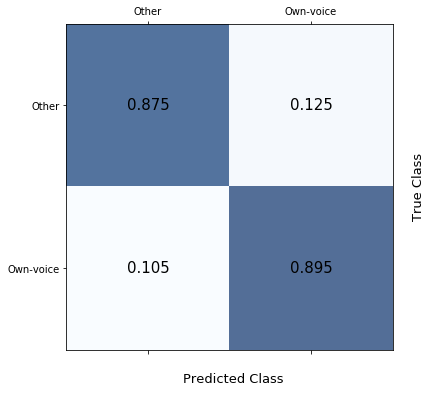

In [28]:
#nicer confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cfm_norm,cmap=plt.cm.Blues,alpha=0.7)

for i in range(cfm_norm.shape[0]):
    for j in range(cfm_norm.shape[1]):
        ax.text(x=j,y=i, s=cfm_norm[i,j],va='center', ha= 'center',fontsize=15)
  
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(['Other','Own-voice'])
ax.set_yticklabels(['Other','Own-voice'])
ax.yaxis.set_label_coords(1.1,0.5)
ax.xaxis.set_label_coords(0.51,-0.07)
ax.set_xlabel('Predicted Class',fontsize=13)
ax.set_ylabel('True Class',fontsize=13)
plt.show()


In [30]:
fig.savefig('Conf_Matrix_OwnVoice.png',dpi=80)